In [1]:
import pandas as pd
import os
import glob

# Specify the path to your main folder containing subfolders with CSV files
main_path = r'C:\ResearchFiles\AllFiles_Cleaned'

# Recursively search for all CSV files in the subfolders
all_files = [f for f in glob.glob(os.path.join(main_path, "**/*.csv"), recursive=True)]

# Combine all files into a single DataFrame
df_list = []
for filename in all_files:
    df = pd.read_csv(filename)
    df['smart_plug'] = os.path.basename(filename).split('_')[1]  # Add a column for the smart plug identifier
    # Optionally, add a column for the building by extracting from the path
    df['building'] = os.path.basename(os.path.dirname(filename))
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

In [2]:
# Remove unneccessary columns
combined_df = combined_df.drop(columns = ['analogInput_2', 'analogInput_4', 'analogInput_5', 'binaryInput_3', 'binaryValue_1', 'building'])

# Convert timestamp column to datetime
combined_df['time'] = pd.to_datetime(combined_df['time'])

# Rename the power consumption column more appropriately
combined_df = combined_df.rename(columns = {'analogInput_3': 'power_consumption (mW)'})

# Set the timestamp as index for easier use when graphing
combined_df.set_index('time', inplace=True)

In [3]:
combined_df

,power_consumption (mW),smart_plug
time,,
2023-09-14 18:16:00,30392.714286,180940
2023-09-14 18:17:00,31416.000000,180940
2023-09-14 18:18:00,30044.000000,180940
2023-09-14 18:19:00,30740.000000,180940
2023-09-14 18:20:00,29952.000000,180940
...,...,...
2024-06-10 23:55:00,20587.000000,657128
2024-06-10 23:56:00,21240.000000,657128
2024-06-10 23:57:00,20760.000000,657128


In [4]:
# Resample to monthly intervals for easier graphing abilities
monthly_df = combined_df.resample('M').mean(numeric_only=True)

# Convert all power consumption values from milliWatt to KW/h and rename appropriately
monthly_df['power_consumption (mW)'] = monthly_df['power_consumption (mW)']/ 1_000_000
monthly_df.rename(columns = {'power_consumption (mW)': 'power_consumption (KW)'}, inplace=True)

In [5]:
monthly_df

,power_consumption (KW)
time,
2023-09-30,0.016111
2023-10-31,0.018199
2023-11-30,0.018537
2023-12-31,0.017575
2024-01-31,0.018555
2024-02-29,0.018672
2024-03-31,0.018004
2024-04-30,0.018621
2024-05-31,0.018171


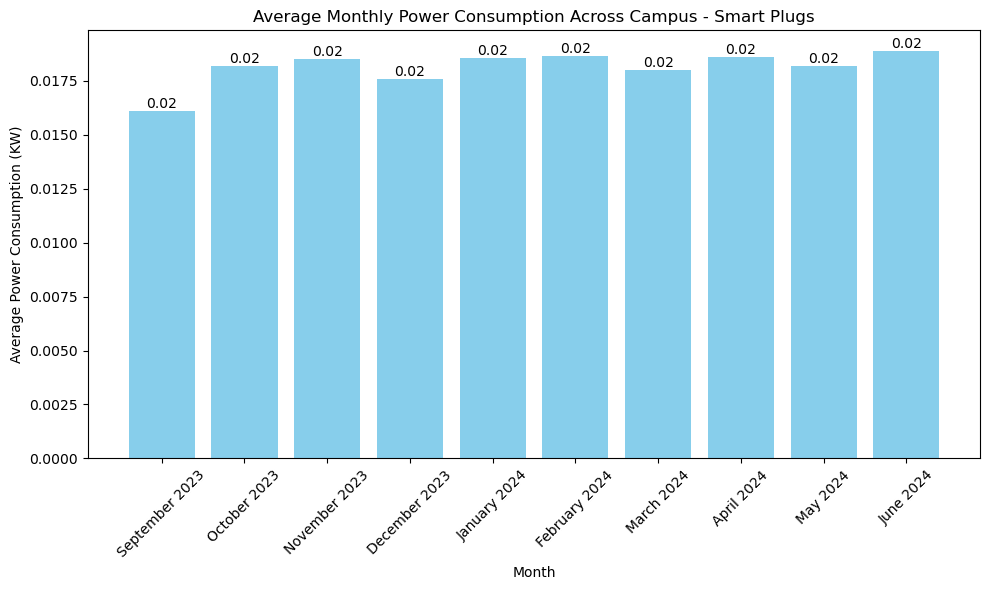

In [7]:
# Creating a bar graph that shows the average power consumption across the entire dataset for each month that we have data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting the bar charts
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_df.index.strftime('%B %Y'), monthly_df['power_consumption (KW)'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Power Consumption (KW)')
plt.title(f'Average Monthly Power Consumption Across Campus - Smart Plugs')
plt.xticks(rotation=45)

# Adding the monthly consumption values on top of each bar for better visual presentation
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()